<a href="https://colab.research.google.com/github/liberjul/code_utilities/blob/main/Chromatogram_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to our tutorial on Chromatogram processing!
### You can use this to automate your processing of Sanger data.

Run each cell by clicking on it, then pressing "Shift + Enter".

Note: While automatic trimming often works, there are occassionally errors that should be dealt with by visual inspection. If the output sequence is short, you can look at it with a viewing program such as [Chromas](http://technelysium.com.au/wp/chromas/) for Windows or [4Peaks](https://nucleobytes.com/4peaks/) for Mac.

To start off:

1. Download your sequence data from MSU's genomics depot at https://genomicsdepot.bch.msu.edu/

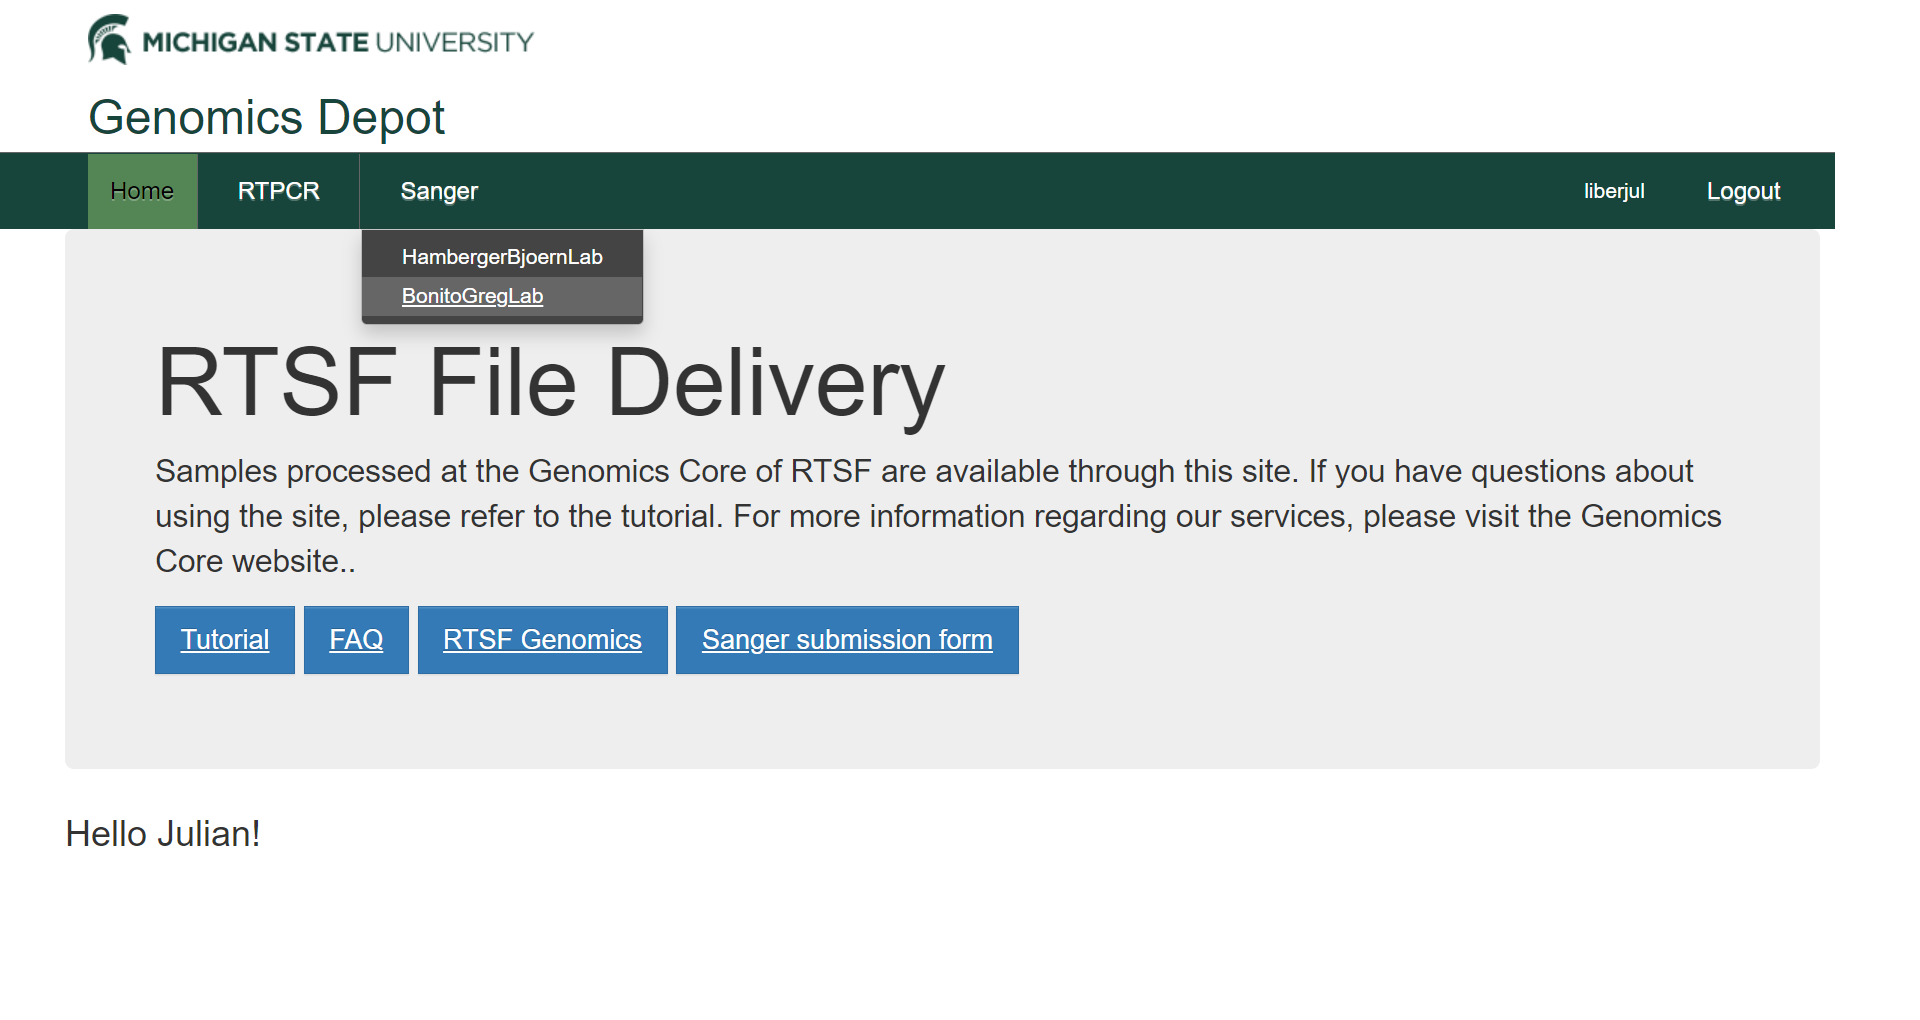
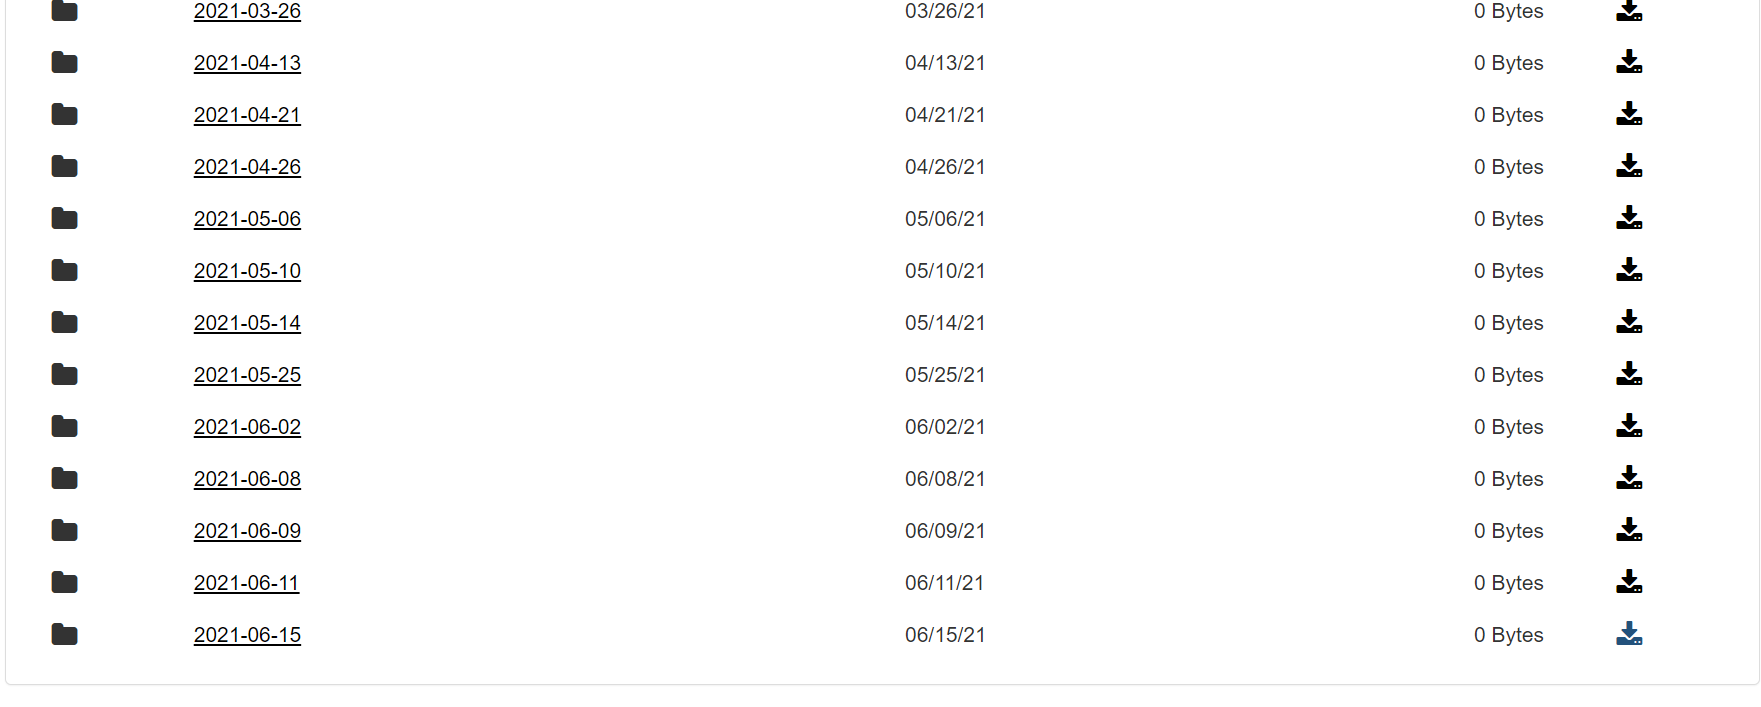
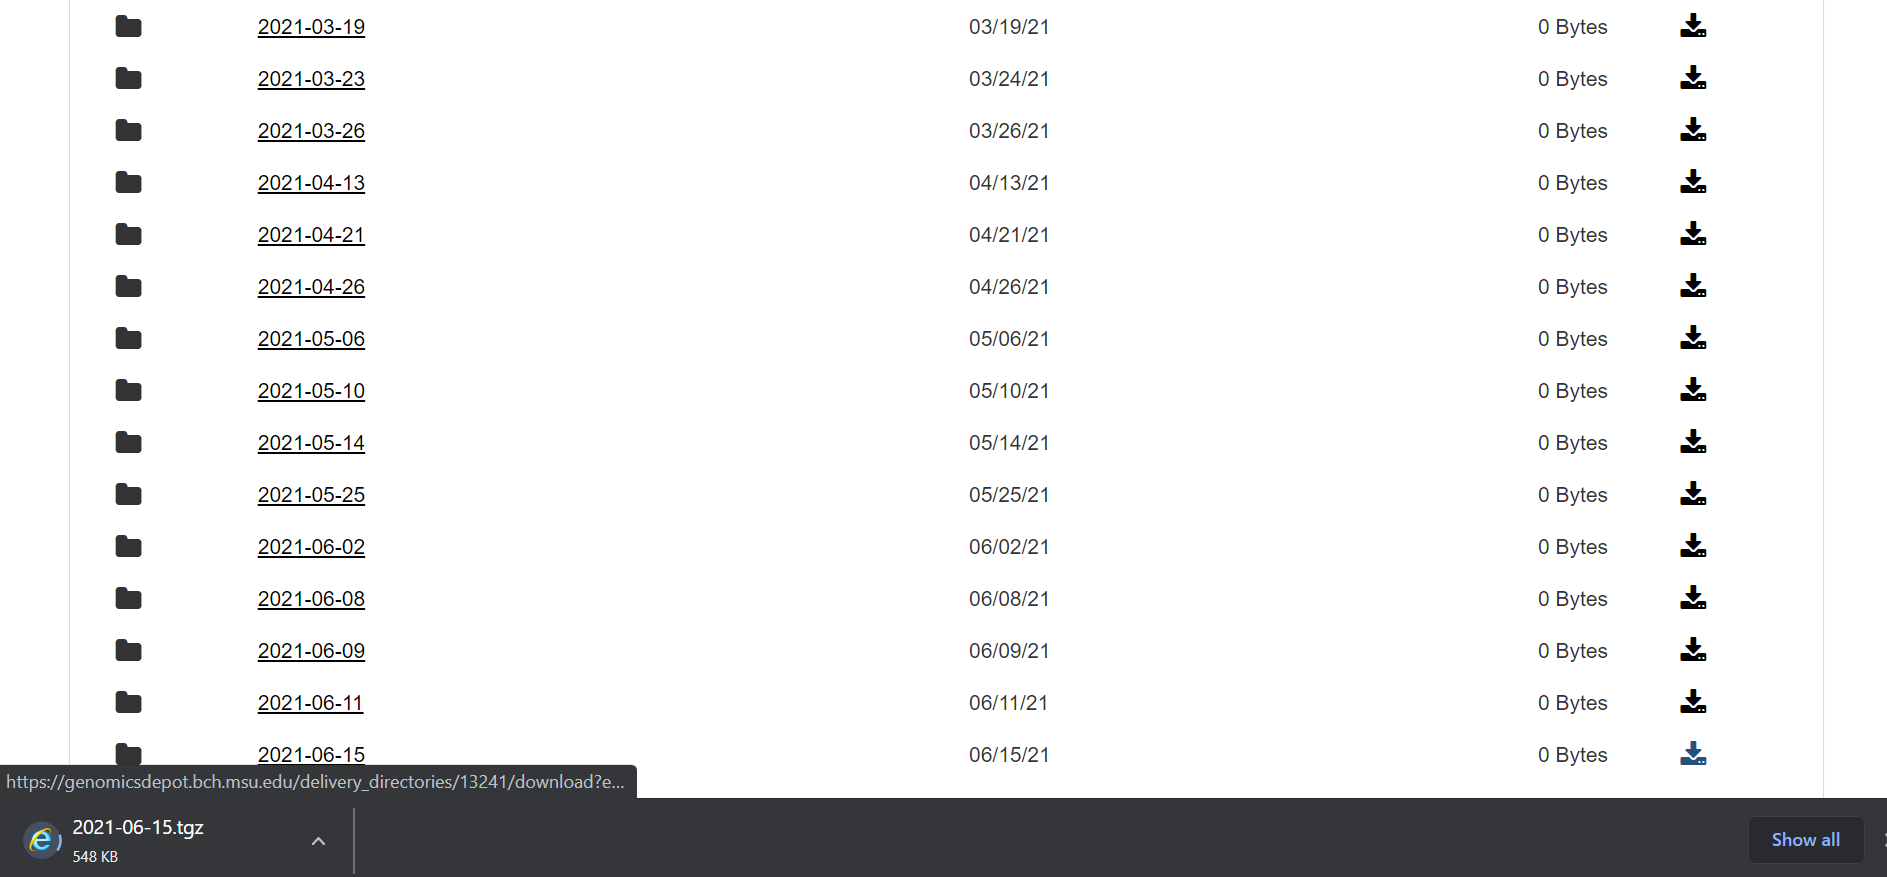
2. Make a metadata spreadsheet in the shared [Sanger Sequencing](https://drive.google.com/drive/u/1/folders/1tpEG9o2DQW8AkabnucUbE6LmdTk4U6jS) folder on the lab's Google Drive. If you need access, please contact liberjul@msu.edu. You should model it after [this sheet](https://docs.google.com/spreadsheets/d/17E7pqH9xQN1AocJnKpG0AVPaU_kHoksa1IIfbOGXEvc/edit#gid=0), with the same columns and position format.

3. Upload your zipped sequence data folder to the same [Sanger Sequencing](https://drive.google.com/drive/u/1/folders/1tpEG9o2DQW8AkabnucUbE6LmdTk4U6jS) folder.

4. Run the below cells for an example.

5. Try your own data by filling in the information requested in <>.

In [ ]:
!pip install Biopython

In [ ]:
# Clone the code utilities repo
!git clone -l -s git://github.com/liberjul/code_utilities.git
%cd code_utilities
!ls

In [ ]:
import glob, gspread, os
import pandas as pd
from code_utilities.abi_handling import gen_cut_fastas_phred
from google.colab import auth, drive
auth.authenticate_user()
from oauth2client.client import GoogleCredentials

In [ ]:
drive.mount('/content/drive')
path_to_zip = "/content/drive/MyDrive/Sanger Sequencing/2021-06-15.tgz"
!tar -xzvf /content/drive/MyDrive/Sanger\ Sequencing/2021-06-15.tgz -C /content/

In [ ]:
parent = "/content/2021-06-15/" # The folder where chromatogram files are located

metadata_sheet_name = "Bonito_2021_06_14"

seq_files = glob.glob(parent + "*.ab1") # Find all the chromatogram files.

# The index at which the plate position is found. For a filename like Bonito_20210614_E02_056_061421_1_2021-06-14.ab1,
# the position (E02) is at index 2 after splitting at underscores.
index_of_pos = 2 

seq_dict = {}
for i in seq_files:
    seq_dict[i.split("_")[index_of_pos]] = i
print(seq_dict)

In [ ]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open(metadata_sheet_name).sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
data = pd.DataFrame.from_records(rows[1:], columns=rows[0])

for i in range(len(data)):
    pos = data.Position[i]
    os.rename(seq_dict[pos], F"{parent}{data.Name[i]}_{pos}.ab1")
    gen_cut_fastas_phred(F"{parent}{data.Name[i]}_{pos}.ab1", parent, F"{parent}{data.Name[i]}_{pos}")

In [ ]:
# Print out the FASTAs generated. You can copy and paste these to then BLAST them here https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome

fasta_files = glob.glob(parent + "*.fasta") # Find all the FASTA files.
for i in fasta_files:
  with open(i, "r") as ifile:
    print(ifile.read()) # Print out their contents.

If you have sequenced a locus with a forward (sense) and reverse (antisense) primers and believe that the sequences overlap, you can assemble the reads with the below code.

In [ ]:
from code_utilities.auto_sanger_seq_assem import assem_seqs
from code_utilities.seq_from_filename import *
from code_utilities.seq_to_filename import *

In [ ]:
# Specify the forward read
seq1 = seq_from_filename("/content/2021-06-15/JL62_1870_F3_C01.fasta")
# Specify the reverse read
seq2 = seq_from_filename("/content/2021-06-15/JL62_1870_R4_C02.fasta")

seq_assem = assem_seqs(seq1, seq2) # generate the assembled sequence
print(seq_assem)

If a substantial overlap is found (>= 20 base pairs), continue to the next cell to save this assembled sequence.

In [ ]:
seq_to_filename("JL62_1870_F3-R4", # the FASTA header
                seq_assem, # the assembled sequence
                "/content/2021-06-15/JL58_EF1a_JL62_1870_F3-R4.fasta") # the path of the new file

## Let's try with your data below.

You can come back to this section and rerun it with each new dataset.

In [ ]:
!pip install Biopython

In [ ]:
# Clone the code utilities repo
!git clone -l -s git://github.com/liberjul/code_utilities.git
%cd code_utilities
!ls

In [ ]:
import glob, gspread, os
import pandas as pd
from code_utilities.abi_handling import gen_cut_fastas_phred
from google.colab import auth, drive
auth.authenticate_user()
from oauth2client.client import GoogleCredentials

In [ ]:
drive.mount('/content/drive')
path_to_zip = "/content/drive/MyDrive/Sanger Sequencing/<my_zip_file>.tgz" # Replace with file downloaded from Genomics Depot
!tar -xzvf /content/drive/MyDrive/Sanger\ Sequencing/<my_zip_file>.tgz -C /content/ # Replace with file downloaded from Genomics Depot

In [ ]:
parent = "/content/<my_zip_file>/" # The folder where chromatogram files are located

metadata_sheet_name = "<name_of_metadata_sheet>"

seq_files = glob.glob(parent + "*.ab1") # Find all the chromatogram files.

# The index at which the plate position is found. For a filename like Bonito_20210614_E02_056_061421_1_2021-06-14.ab1,
# the position (E02) is at index 2 after splitting at underscores.
index_of_pos = 2 # Check that this is correct here and in the cell output

seq_dict = {}
for i in seq_files:
    seq_dict[i.split("_")[index_of_pos]] = i
print(seq_dict)

# Check that the position matches the filename before moving to the next cell

In [ ]:
# Nothing to change here, just run the cell with Shift+Enter or Crtl+Enter

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open(metadata_sheet_name).sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
data = pd.DataFrame.from_records(rows[1:], columns=rows[0])

for i in range(len(data)):
    pos = data.Position[i]
    os.rename(seq_dict[pos], F"{parent}{data.Name[i]}_{pos}.ab1")
chromat_files = glob.glob(parent + "*.ab1")
for i in chromat_files:
    gen_cut_fastas_phred(i, parent, os.path.basename(i).split(".")[0])

In [ ]:
# Nothing to change here, just run the cell with Shift+Enter or Crtl+Enter

# Print out the FASTAs generated. You can copy and paste these to then BLAST them here https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome

fasta_files = glob.glob(parent + "*.fasta") # Find all the FASTA files.
for i in fasta_files:
  with open(i, "r") as ifile:
    print(ifile.read()) # Print out their contents.

If you have sequenced a locus with a forward (sense) and reverse (antisense) primers and believe that the sequences overlap, you can assemble the reads with the below code.

In [ ]:
from code_utilities.auto_sanger_seq_assem import assem_seqs
from code_utilities.seq_from_filename import *
from code_utilities.seq_to_filename import *

In [ ]:
# Specify the forward read
seq1 = seq_from_filename("/content/<my_zip_file>/<forward_seq>.fasta")
# Specify the reverse read
seq2 = seq_from_filename("/content/<my_zip_file>/<reverse_seq>.fasta")

seq_assem = assem_seqs(seq1, seq2) # generate the assembled sequence
print(seq_assem)

If a substantial overlap is found (>= 20 base pairs), continue to the next cell to save this assembled sequence.

In [ ]:
seq_to_filename("<header>", # the FASTA header
                seq_assem, # the assembled sequence
                "/content/<my_zip_file>/<header>.fasta") # the path of the new file